In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [47]:
house = pd.read_csv("https://drive.google.com/uc?export=download&id=1kgJseOaDUCG-p-IoLIKbnL23XHUZPEwm")

In [48]:
house.shape

(21613, 21)

<AxesSubplot:>

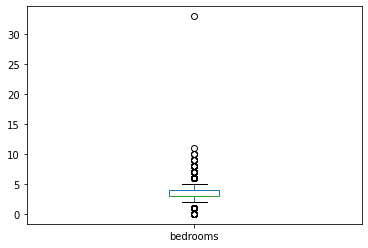

In [49]:
# 10 samples to check outliers
house['bedrooms'].plot.box()

<AxesSubplot:>

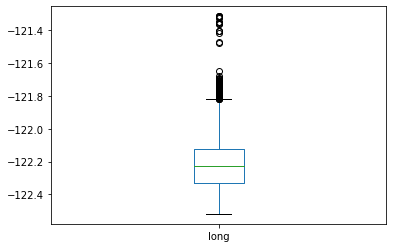

In [50]:
house['long'].plot.box()

<AxesSubplot:>

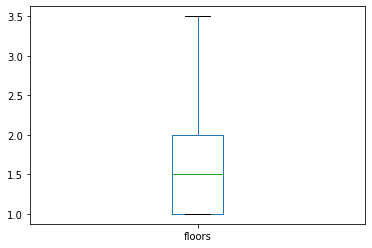

In [51]:
house['floors'].plot.box()

<AxesSubplot:>

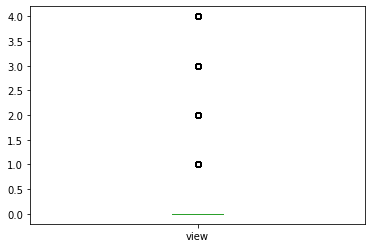

In [52]:
house['view'].plot.box()

<AxesSubplot:>

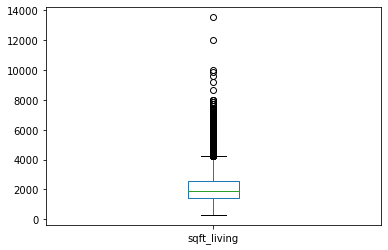

In [53]:
house['sqft_living'].plot.box()

<AxesSubplot:>

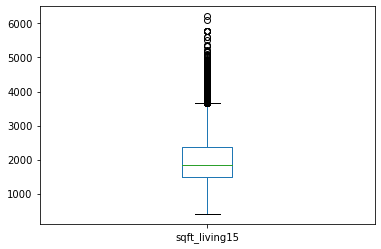

In [54]:
house['sqft_living15'].plot.box()

<AxesSubplot:>

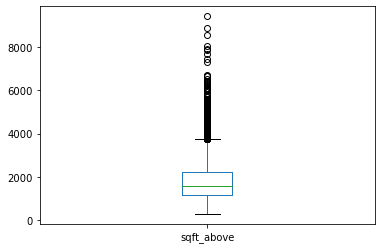

In [55]:
house['sqft_above'].plot.box()

<AxesSubplot:>

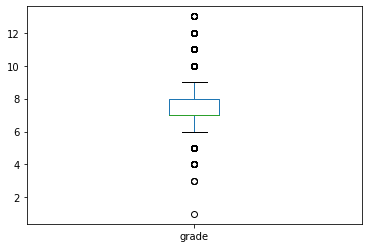

In [56]:
house['grade'].plot.box()

<AxesSubplot:>

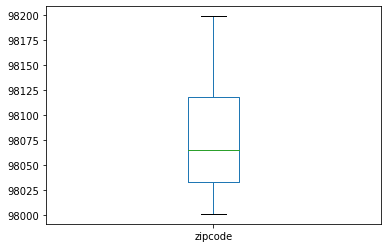

In [57]:
house['zipcode'].plot.box()

<AxesSubplot:>

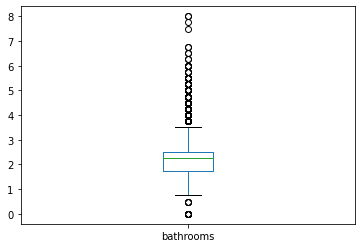

In [58]:
house['bathrooms'].plot.box()

In [59]:
numeric_variable = ['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']

for i in range(len(numeric_variable)):
    Q1 = house[numeric_variable[i]].quantile(0.25)
    Q3 = house[numeric_variable[i]].quantile(0.75)
    IQR = Q3-Q1
    min = Q1 - (1.5*IQR)
    max = Q3 + (1.5*IQR)
    house= house[(house[numeric_variable[i]]>min)&(house[numeric_variable[i]]<max)]

In [60]:
house.shape

(16691, 21)

In [61]:
house.drop(['waterfront','view','condition','grade'], axis='columns', inplace=True)

In [62]:
house.shape

(16691, 17)

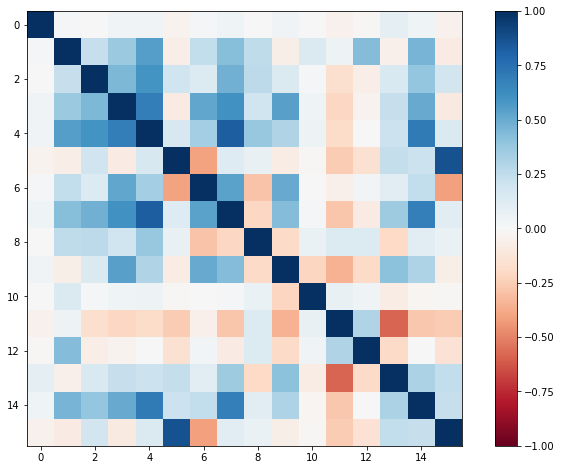

In [63]:
#color bar
fig = plt.figure(figsize=(12,8))
cax = plt.imshow(house.corr(),vmin=-1,vmax=1,cmap=plt.cm.RdBu)
plt.colorbar(cax)

In [64]:
data = house.corr()
data = data.sort_values(by=['price'],axis=1, ascending=False)
data = data.iloc[range(16),0]
data = data.sort_values(ascending = False)
data = data.iloc[0:16]
print(data)

price            1.000000
sqft_living      0.553300
sqft_living15    0.465972
lat              0.434062
sqft_above       0.429322
bathrooms        0.373369
sqft_basement    0.255215
floors           0.244042
bedrooms         0.229617
yr_renovated     0.145661
zipcode          0.049157
id               0.020078
long            -0.052824
yr_built        -0.056608
sqft_lot        -0.064642
sqft_lot15      -0.080319
Name: price, dtype: float64


<AxesSubplot:xlabel='yr_renovated'>

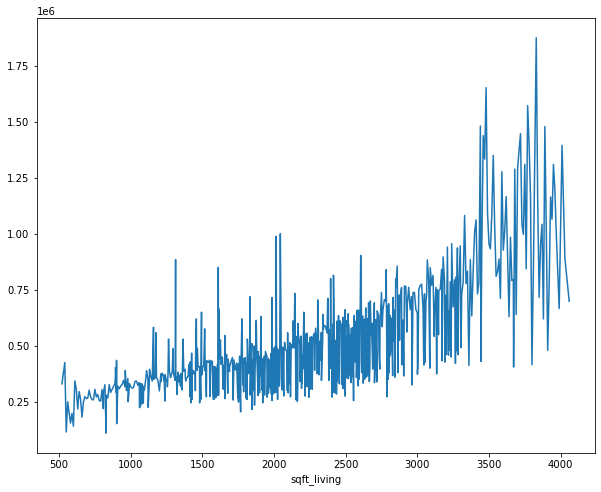

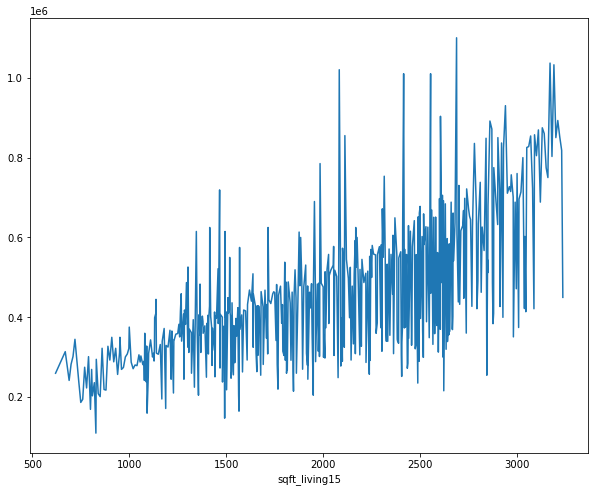

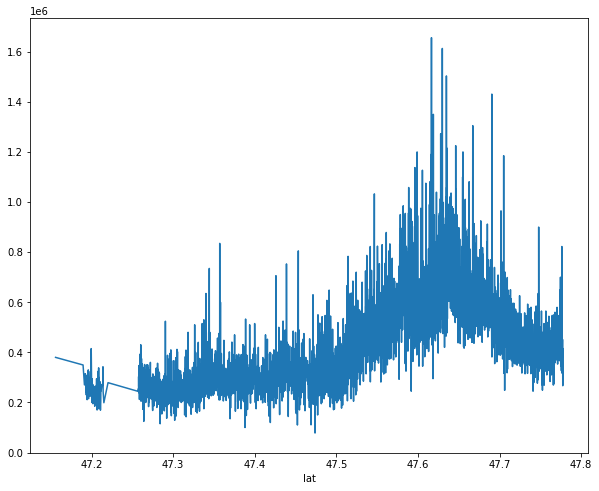

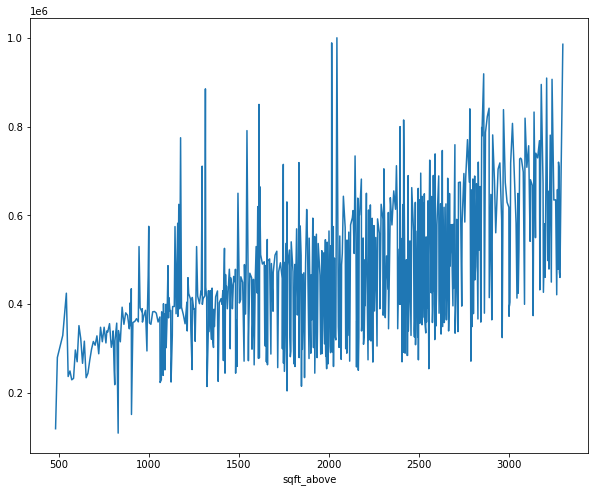

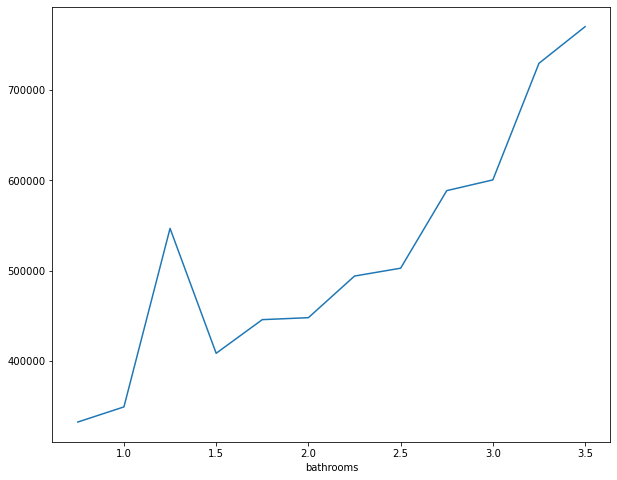

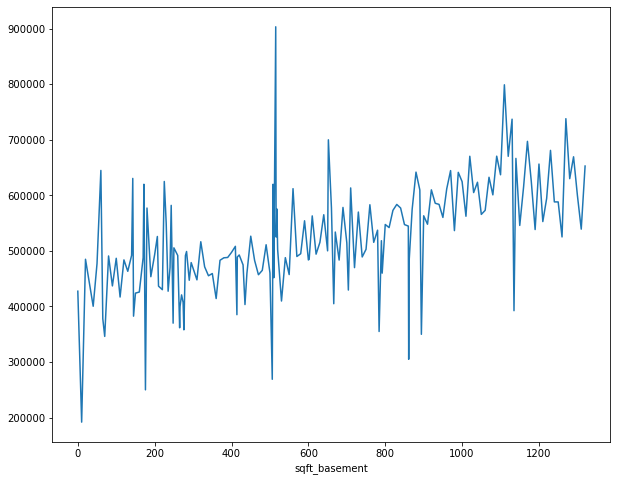

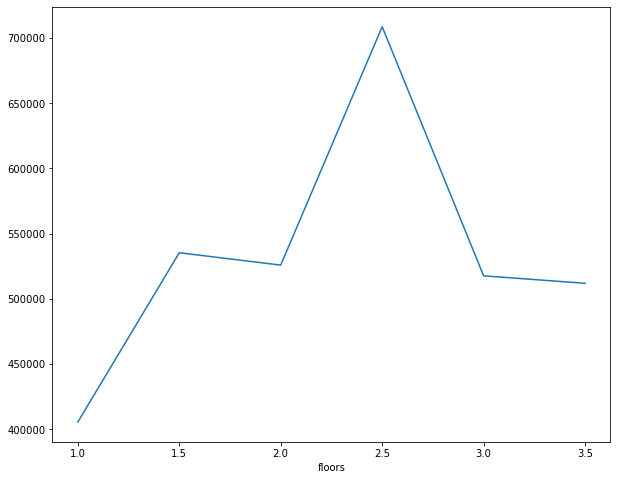

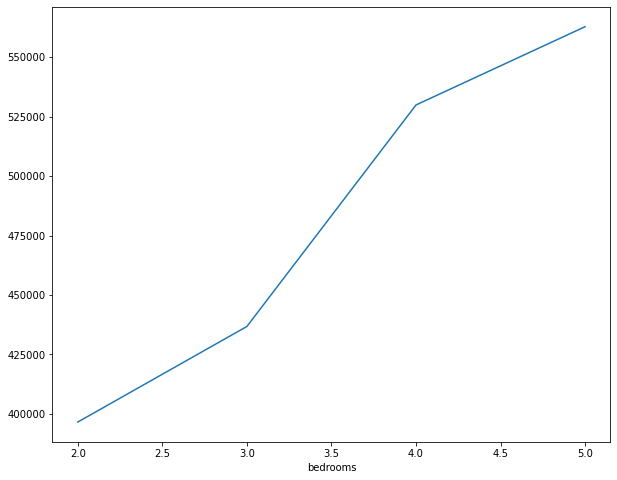

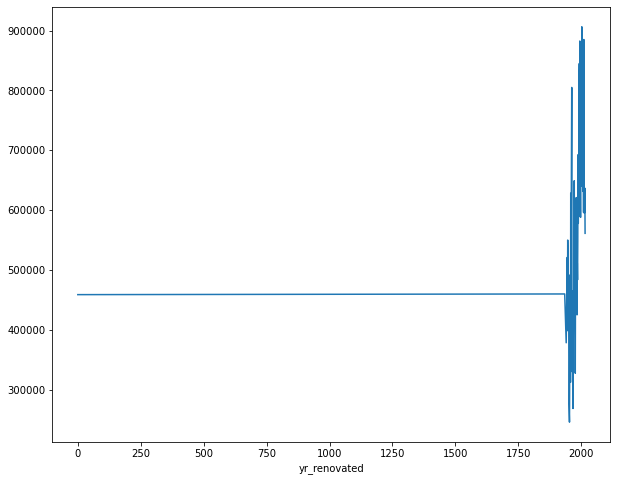

In [65]:
# plot for price & sqft_living
fig = plt.figure(figsize=(10,8))
house.groupby('sqft_living')['price'].mean().plot()

# plot for price & sqft_living15 
fig = plt.figure(figsize=(10,8))
house.groupby('sqft_living15')['price'].mean().plot()

# plot for price & lat
fig = plt.figure(figsize=(10,8))
house.groupby('lat')['price'].mean().plot()

# plot for price & sqft_above 
fig = plt.figure(figsize=(10,8))
house.groupby('sqft_above')['price'].mean().plot()

# plot for price & bathrooms 
fig = plt.figure(figsize=(10,8))
house.groupby('bathrooms')['price'].mean().plot()

# plot for price & sqft_basement 
fig = plt.figure(figsize=(10,8))
house.groupby('sqft_basement')['price'].mean().plot()


# plot for price & floors
fig = plt.figure(figsize=(10,8))
house.groupby('floors')['price'].mean().plot()

# plot for price & bedrooms 
fig = plt.figure(figsize=(10,8))
house.groupby('bedrooms')['price'].mean().plot()


# plot for price & yr_renovated
fig = plt.figure(figsize=(10,8))
house.groupby('yr_renovated')['price'].mean().plot()


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='lat', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='sqft_living'>,
        <AxesSubplot:xlabe

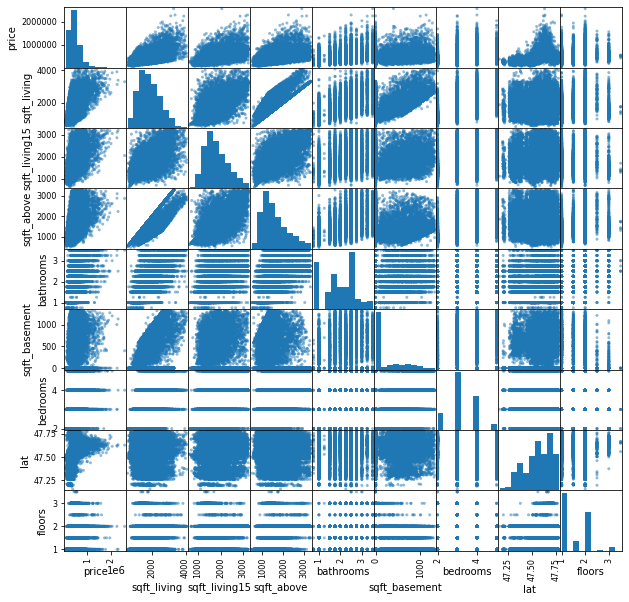

In [67]:
# scatter matrix 
scatter_matrix(house[['price','sqft_living','sqft_living15','sqft_above','bathrooms','sqft_basement','bedrooms','lat','floors']],figsize=(10,10))

In [68]:
# sqft_living
reg = LinearRegression()
reg.fit(house[['bathrooms', 'sqft_above', 'sqft_living15','sqft_basement','bedrooms','lat','floors']], house['sqft_living'])
vif = 1/(1-reg.score(house[['bathrooms', 'sqft_above', 'sqft_living15','sqft_basement','bedrooms','lat','floors']], house['sqft_living']))
print("sqft_living_VIF: ",vif)

# sqft_living15
reg = LinearRegression()
reg.fit(house[['bathrooms', 'sqft_above', 'sqft_living','sqft_basement','bedrooms','lat','floors']], house['sqft_living15'])
vif = 1/(1-reg.score(house[['bathrooms', 'sqft_above', 'sqft_living','sqft_basement','bedrooms','lat','floors']], house['sqft_living15']))
print("sqft_living15_VIF: ",vif)

# sqft_above
reg = LinearRegression()
reg.fit(house[['bathrooms', 'sqft_living', 'sqft_living15','sqft_basement','bedrooms','lat','floors']], house['sqft_above'])
vif = 1/(1-reg.score(house[['bathrooms', 'sqft_living', 'sqft_living15','sqft_basement','bedrooms','lat','floors']], house['sqft_above']))
print("sqft_above_VIF: ",vif)

# bathrooms
reg = LinearRegression()
reg.fit(house[['sqft_living', 'sqft_above', 'sqft_living15','sqft_basement','bedrooms','lat','floors']], house['bathrooms'])
vif = 1/(1-reg.score(house[['sqft_living', 'sqft_above', 'sqft_living15','sqft_basement','bedrooms','lat','floors']], house['bathrooms']))
print("bathrooms_VIF: ",vif)

# sqft_basement
reg = LinearRegression()
reg.fit(house[['sqft_living', 'sqft_above', 'sqft_living15','bathrooms','bedrooms','lat','floors']], house['sqft_basement'])
vif = 1/(1-reg.score(house[['sqft_living', 'sqft_above', 'sqft_living15','bathrooms','bedrooms','lat','floors']], house['sqft_basement']))
print("sqft_basement_VIF: ",vif)

# bedrooms
reg = LinearRegression()
reg.fit(house[['bathrooms', 'sqft_above', 'sqft_living15','sqft_basement','sqft_living','lat','floors']], house['bedrooms'])
vif = 1/(1-reg.score(house[['bathrooms', 'sqft_above', 'sqft_living15','sqft_basement','sqft_living','lat','floors']], house['bedrooms']))
print("bedrooms_VIF: ",vif)

# lat
reg = LinearRegression()
reg.fit(house[['bathrooms', 'sqft_above', 'sqft_living15','sqft_basement','sqft_living','bedrooms','floors']], house['lat'])
vif = 1/(1-reg.score(house[['bathrooms', 'sqft_above', 'sqft_living15','sqft_basement','sqft_living','bedrooms','floors']], house['lat']))
print("lat_VIF: ",vif)


# floors
reg = LinearRegression()
reg.fit(house[['bathrooms', 'sqft_above', 'sqft_living15','sqft_basement','sqft_living','lat','bedrooms']], house['floors'])
vif = 1/(1-reg.score(house[['bathrooms', 'sqft_above', 'sqft_living15','sqft_basement','sqft_living','lat','bedrooms']], house['floors']))
print("floors_VIF: ",vif)

sqft_living_VIF:  inf
sqft_living15_VIF:  2.1934943086061853
sqft_above_VIF:  inf
bathrooms_VIF:  2.433175042921314
sqft_basement_VIF:  inf
bedrooms_VIF:  1.6141881694194566
lat_VIF:  1.0505415256523902
floors_VIF:  1.9162374463854137


<ipython-input-68-dadb6ef4ba9e>:4: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1-reg.score(house[['bathrooms', 'sqft_above', 'sqft_living15','sqft_basement','bedrooms','lat','floors']], house['sqft_living']))
<ipython-input-68-dadb6ef4ba9e>:16: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1-reg.score(house[['bathrooms', 'sqft_living', 'sqft_living15','sqft_basement','bedrooms','lat','floors']], house['sqft_above']))
<ipython-input-68-dadb6ef4ba9e>:28: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1-reg.score(house[['sqft_living', 'sqft_above', 'sqft_living15','bathrooms','bedrooms','lat','floors']], house['sqft_basement']))


In [71]:
#linear model

X = house[['bathrooms', 'sqft_living', 'sqft_living15','sqft_above','lat','bedrooms','floors']]
y = house[['price']]

X = sm.add_constant(X)

model = sm.OLS(y,X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     2554.
Date:                Thu, 16 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:26:03   Log-Likelihood:            -2.2335e+05
No. Observations:               16691   AIC:                         4.467e+05
Df Residuals:                   16683   BIC:                         4.468e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.227e+07   4.27e+05    -75.573      0.000   -3.31e+07   -3.14e+07
bathrooms     -8360.6735   2879.549     -2.903      0.004    -1.4e+04   -2716.452
sqft_living     202.9916      4.516     44.948      0.000     194.139     211.844
sqft_living15    74.7136      3.557     21.007      0.000      67.742      81.685
sqft_above      -36.3701      4.455     -8.164      0.000     -45.102     -27.638
lat            6.801e+05   8974.686     75.775      0.000    6.62e+05    6.98e+05
bedrooms      -2.852e+04   1992.565    -14.314      0.000   -3.24e+04   -2.46e+04
floors         3.307e+04   3074.514     10.755      0.000     2.7e+04    3.91e+04
==============================================================================
Omnibus:                     6664.132   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51758.386
Skew:                           1.724   Prob(JB):                         0.00
Kurtosis:                      10.908   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""